## Overview

The Purpose of this document is to show empirically the potential interest of the
dimensionality Reduction in Machine Learning with Ensemble Methods algorithms.

## Import Libraries

In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import math as mt
import scipy

from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

## Loading Dataset
we will use the cardiovascular dataset hosted in kaggle 

In [2]:
url = 'cardiovascular.txt'
data = pd.read_csv(url,sep=';',decimal=',')

# let's separate index from other columns
data.index = data.iloc[:,0]
df = data.iloc[:,1:]

df = df.drop(['chd','famhist'],axis=1)


Let's take a look for our data

In [3]:
data.head()


,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,,
1,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
data.shape

(462, 11)

In [5]:
df.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
ind,,,,,,,,
1,160,12.00,5.73,23.11,49,25.30,97.20,52
2,144,0.01,4.41,28.61,55,28.87,2.06,63
3,118,0.08,3.48,32.28,52,29.14,3.81,46
4,170,7.50,6.41,38.03,51,31.99,24.26,58
5,134,13.60,3.50,27.78,60,25.99,57.34,49


## Data Description : 

1. sbp: systolic blood pressure
2. tobacco: cumulative tobacco (kg)
3. ldl: low densiity lipoprotein cholesterol
4. adiposity
5. famhist: family history of heart disease (Present, Absent)
6. typea: type-A behavior
7. obesity
8. alcohol: current alcohol consumption
9. age: age at onset
10. chd: coronary heart disease

you can take more information about the dataset [here](https://www.kaggle.com/yassinehamdaoui1/cardiovascular-disease)

In [6]:
df.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
ind,,,,,,,,
1,160,12.00,5.73,23.11,49,25.30,97.20,52
2,144,0.01,4.41,28.61,55,28.87,2.06,63
3,118,0.08,3.48,32.28,52,29.14,3.81,46
4,170,7.50,6.41,38.03,51,31.99,24.26,58
5,134,13.60,3.50,27.78,60,25.99,57.34,49


In [7]:
df.dtypes

sbp           int64
tobacco      object
ldl          object
adiposity    object
typea         int64
obesity      object
alcohol      object
age           int64
dtype: object

We need to convert object types to float

In [8]:
df = df.astype('float')

In [9]:
df.dtypes

sbp          float64
tobacco      float64
ldl          float64
adiposity    float64
typea        float64
obesity      float64
alcohol      float64
age          float64
dtype: object

## Data Description

In [10]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


Absent     0.584416
Present    0.415584
Name: famhist, dtype: float64
0    0.65368
1    0.34632
Name: chd, dtype: float64


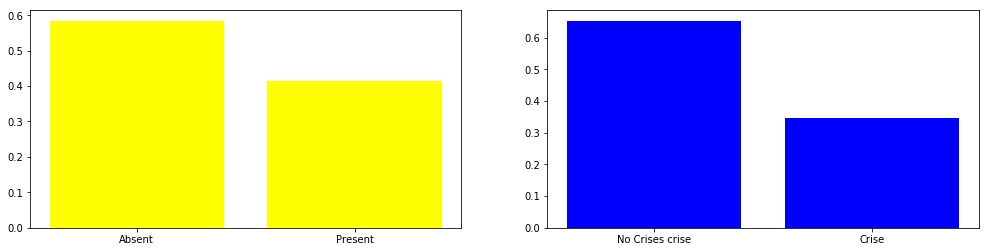

In [11]:
famhist_height = data.famhist.value_counts()/data.shape[0]

chd_height =data.chd.value_counts()/data.shape[0]

print(famhist_height)
print(chd_height)

fig = plt.figure(figsize=(17,4))
ax1 = fig.add_subplot(1, 2, 1)
plt.bar(x=['Absent','Present'],height=famhist_height,color='yellow')
ax2 = fig.add_subplot(1, 2, 2)
plt.bar(x=['No Crises crise','Crise'],height=chd_height,color='b')
plt.show()

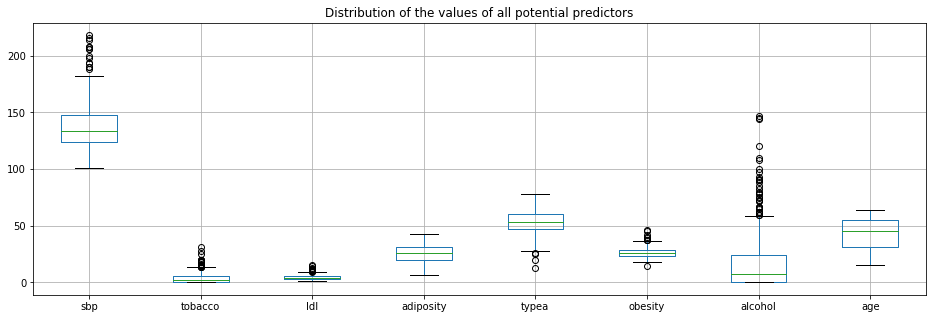

In [12]:
plt.figure(figsize=(16,5))
df.boxplot()
plt.title("Distribution of the values ​​of all potential predictors")
plt.show()

We observe a large Scale difference between variables. 
We need to standardize them to avoid  those with large scales wrongly have too much weight in the calculations.
Regarding abberant values, their effect should be reduced by methods that are not very sensitive to them.

In [13]:
df=StandardScaler().fit_transform(df)

df=pd.DataFrame(df,columns=['sbp', 'tobacco', 'ldl', 'adiposity','obesity','alcohol', 'age','typea'])

df.index=data.index

In [14]:
df.head()

,sbp,tobacco,ldl,adiposity,obesity,alcohol,age,typea
ind,,,,,,,,
1,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336
2,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115
3,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184
4,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488
5,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760


Let's Add the family history and the target to our dataframe

In [15]:
df1=pd.concat([df,data.famhist,data.chd],axis=1)

# and take a look 
df1.head()

,sbp,tobacco,ldl,adiposity,obesity,alcohol,age,typea,famhist,chd
ind,,,,,,,,,,
1,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,Present,1
2,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,Absent,1
3,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,Present,0
4,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,Present,1
5,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,Present,1


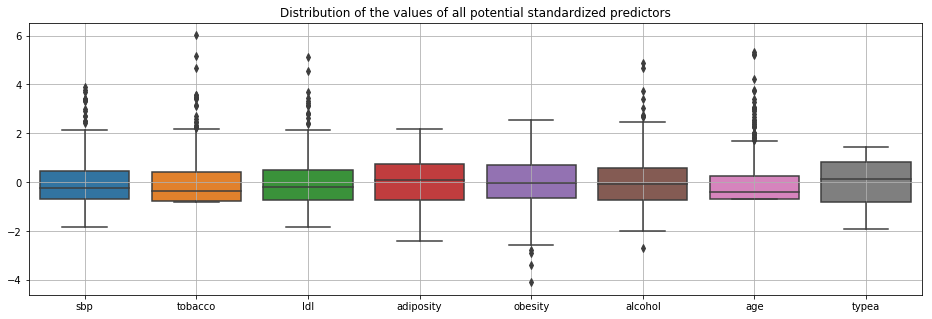

In [16]:
plt.figure(figsize=(16,5))
sea.boxplot(data=df1.iloc[:,:-2])
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

looks better with standardization :) !!

## Dimensionality Reduction

### Correlation :

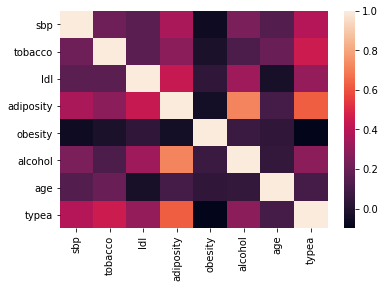

In [17]:
R=round(df.corr(),ndigits=3)
sea.heatmap(round(R,ndigits=2))
plt.show()

## Interpretation


The observation of the coefficients of the correlation matrix above suggests that:

- Age is correlated with tobacco consumption and level of adiposity;
- Obesity is strongly correlated with adiposity;
- Idl is correlated with adiposity.
- In short, older and obese subjects tend to have more fat accumulated under
  the skin.

## Bartlett's sphericity test

In [18]:
n=df.shape[0]
p=df.shape[1]

khi2=-(n-1-(2*p+5)/6)*mt.log(np.linalg.det(R)) # chi test

ddl=p*(p-1)/2

p_valeur=scipy.stats.chi2.pdf(khi2,ddl)

check the p-value

In [19]:
print(p_valeur < 0.01)

True


Conclusion of the sphericity test : 

Hypothesis : Othogonality of the variables

Since the p-value is less than the chosen threshold, we reject the null hypothesis of orthogonality of
variables.

so : PCA is therefore relevant within the meaning of this test.


## Kaiser’s Measure of Sampling Adequacy

In [20]:
inv_R=np.linalg.inv(R)

A=np.zeros(shape=(inv_R.shape[0],inv_R.shape[1]))
for i in range(inv_R.shape[0]):
    for j in range(i+1,inv_R.shape[1]):
        A[i,j]= -inv_R[i,j]/np.sqrt(inv_R[i,i]*inv_R[j,j])
        A[j,i]=A[i,j]
        
R=R.values

kmo_numerateur= np.sum(R**2)-np.sum(np.diag(R**2))
kmo_denominateur=kmo_numerateur + (np.sum(A**2)-np.sum(np.diag(A**2)))
kmo=kmo_numerateur/kmo_denominateur

print("kmo :",round(kmo,ndigits=2))

kmo : 0.67


Since the kmo index is between 0.6 and 0.7,
a compression relevant index can be obtained.
Since some of the values ​​seemed to remain extreme, we are trying a less sensitive approach to them


### Correlation matrix (Spearman)

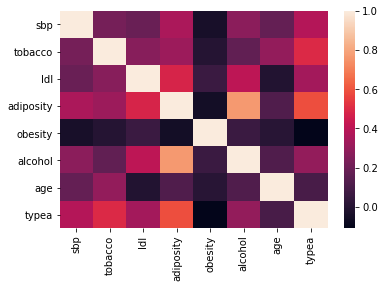

In [21]:
R=round(df.corr(method='spearman'),ndigits=3)
sea.heatmap(round(R,ndigits=2))
plt.show()

### Correlation matrix (Kendall)

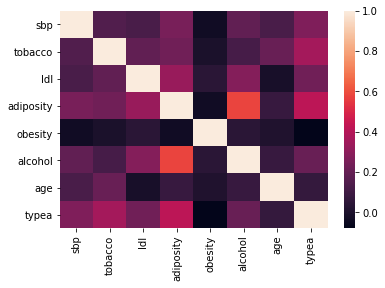

In [22]:
R=round(df.corr(method='kendall'),ndigits=3)
sea.heatmap(round(R,ndigits=2))
plt.show()

A non-parametric PCA based on the Spearman correlation matrix is ​​performed in
due to the presence of many atypical values

In [23]:
#rank the group of records that have the same value
df=df.rank()

### Principal Component Analysis (PCA)

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [25]:
# let's split our data into I/O
X=df.iloc[:,:-1] ; y=df1['chd']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23) 

In [26]:
print( X_train.shape)

(346, 7)


In [27]:
print(X_test.shape)

(116, 7)


In [28]:
pca=PCA(n_components=5) # split in 5 components

principalComponents = pca.fit_transform(X_train)

factors_Df = pd.DataFrame(data = principalComponents, columns =['PC1','PC2','PC3','PC4','PC5'])

factors_Df.index=X_train.index

In [29]:
# take a look
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5
ind,,,,,
28,-59.137200,137.746866,-165.673322,35.629031,-186.595578
360,-76.538494,115.476013,150.617470,134.663595,33.065346
389,-231.398449,-57.996278,92.309157,42.187143,-147.895106
322,-52.422975,88.987756,-52.167519,-197.749086,120.181623
252,227.139305,-229.256165,-6.883820,-7.120955,-98.990768


In [30]:
# let's summary 
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_.sum())

[0.36972103 0.16203157 0.15050121 0.1108632  0.10189052]
[0.36972103 0.5317526  0.68225381 0.793117   0.89500752]
0.8950075163890064


The shared inertia explained by the first 5 components is around 90%

## Visualization of the explained variance

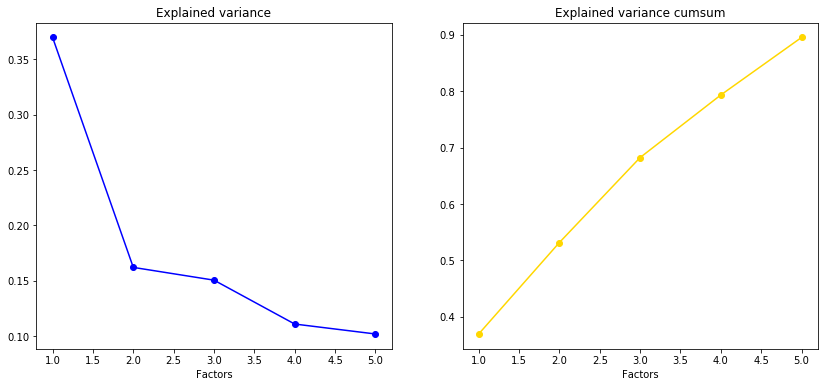

In [31]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,6),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,6),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

## Visualization of projections variables

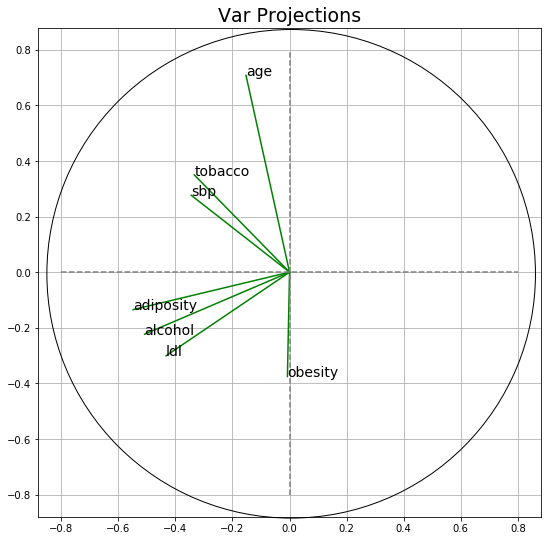

In [32]:
var_fig=plt.figure(figsize=(9,9)) ; pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # show the segment of the origin on point (x, y)
    plt.plot([0, x], [0, y], color='green')
    # show the composition
    plt.text(x, y,df[['sbp','tobacco','ldl','adiposity','obesity','alcohol','age','typea']].columns[i], fontsize='14')

plt.plot([-0.8, 0.8], [0, 0], color='grey', ls='--') # horizontal line y=0    
plt.plot([0, 0], [-0.8, 0.8], color='grey', ls='--') # vertical line x=0
plt.title('Var Projections', fontsize=19)
cercle = plt.Circle((0.515,0.50),0.377,color='k',fill=False)
var_fig.add_artist(cercle)
plt.grid()

## Projections of patients from the learning base

In [33]:
names=pd.DataFrame(data=data.chd,columns=['chd'])

final_factors_Df = pd.concat([factors_Df, data['chd']], axis = 1)
id_factors=pd.concat([names,final_factors_Df],axis=1)
id_factors=id_factors.sort_values(by=['PC1'])
final_factors_Df=final_factors_Df.sort_values(by=['PC1'])

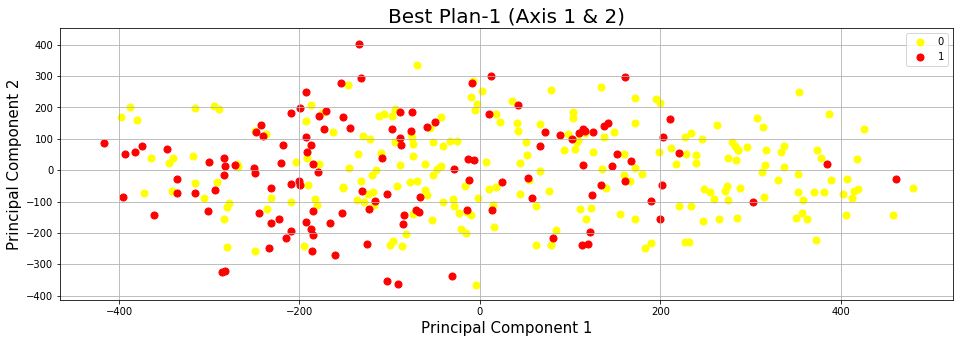

In [34]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Best Plan-1 (Axis 1 & 2)', fontsize = 20)
targets = [0,1]
colors = ['yellow','red']
for target, color in zip(targets,colors):
    indicesToKeep = final_factors_Df['chd'] == target
    ax.scatter(final_factors_Df.loc[indicesToKeep, 'PC1'],final_factors_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
    
ax.legend(targets)
ax.grid()
plt.show()

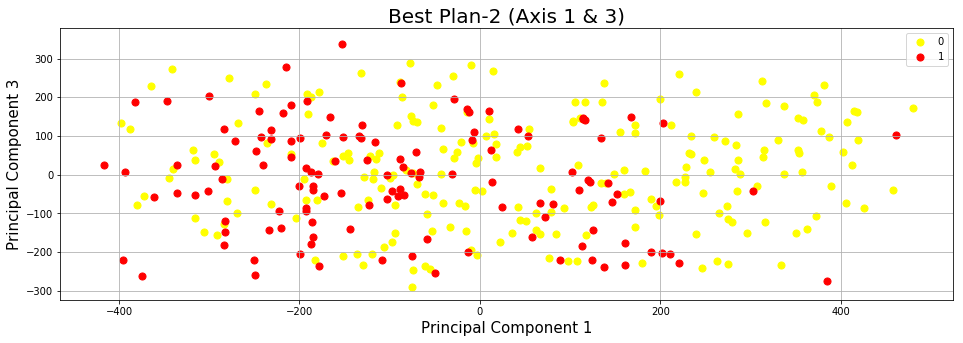

In [35]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Best Plan-2 (Axis 1 & 3)', fontsize = 20)
targets = [0,1]
colors = ['yellow','red']
for target, color in zip(targets,colors):
    indicesToKeep = final_factors_Df['chd'] == target
    ax.scatter(final_factors_Df.loc[indicesToKeep, 'PC1'], final_factors_Df.loc[indicesToKeep, 'PC3'], c = color, s = 50)
    
ax.legend(targets)
ax.grid()

## Projection of the test sample

In [36]:
X_supp=X_test ; y_supp=y_test
coordSupp=pca.transform(X_supp)

In [37]:
coordSupp.shape

(116, 5)

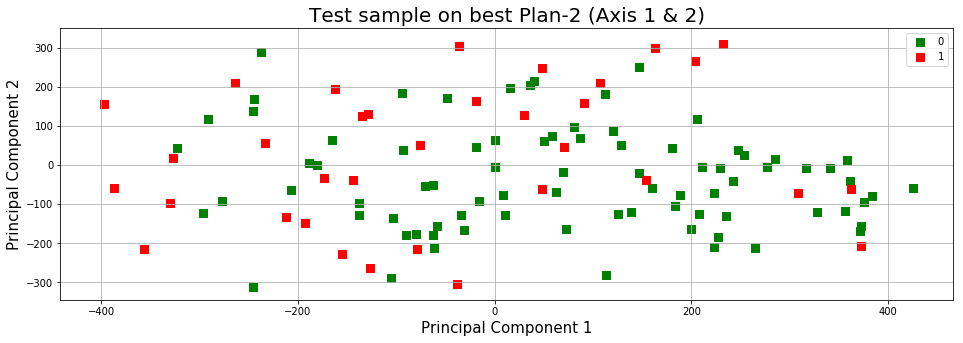

In [38]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Test sample on best Plan-2 (Axis 1 & 2)', fontsize = 20)
df2=pd.DataFrame(data=coordSupp,index=X_supp.index,columns=final_factors_Df.columns[0:5])
df0=df1.loc[X_supp.index]['chd']
gdf=pd.concat([df2,df0],axis=1)
targets = [0,1]
colors = ['green','red']
for target, color in zip(targets,colors):
    indicesToKeep = gdf['chd'] == target
    ax.scatter(gdf.loc[indicesToKeep, 'PC1'], gdf.loc[indicesToKeep, 'PC2'],c= color, s = 50,marker='s')
    ax.legend(targets)

ax.grid()
plt.show()

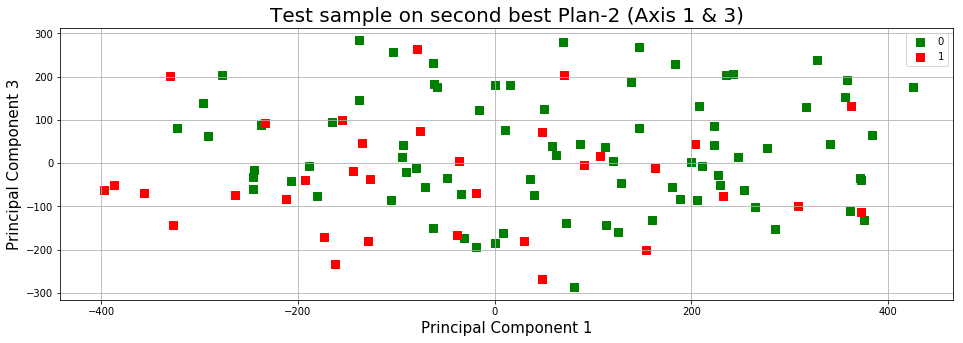

In [39]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Test sample on second best Plan-2 (Axis 1 & 3)', fontsize = 20)
df2=pd.DataFrame(data=coordSupp,index=X_supp.index,columns=final_factors_Df.columns[0:5])
df0=df1.loc[X_supp.index]['chd']
gdf=pd.concat([df2,df0],axis=1)
targets = [0,1]
colors = ['green','red']
for target, color in zip(targets,colors):
    indicesToKeep = gdf['chd'] == target
    ax.scatter(gdf.loc[indicesToKeep, 'PC1'], gdf.loc[indicesToKeep, 'PC3'] , c= color, s = 50,marker='s')

ax.legend(targets)
ax.grid()
plt.show()

####  The binary variable ‘famhist’ is added to the training set

In [40]:
X_train=pd.concat([data.loc[factors_Df.index]['famhist'],factors_Df],axis=1)
X_train.head()

,famhist,PC1,PC2,PC3,PC4,PC5
ind,,,,,,
28,Absent,-59.137200,137.746866,-165.673322,35.629031,-186.595578
360,Present,-76.538494,115.476013,150.617470,134.663595,33.065346
389,Absent,-231.398449,-57.996278,92.309157,42.187143,-147.895106
322,Present,-52.422975,88.987756,-52.167519,-197.749086,120.181623
252,Absent,227.139305,-229.256165,-6.883820,-7.120955,-98.990768


#### The binary variable ‘famhist’ is added to the test set

In [41]:
test_DF=pd.DataFrame(coordSupp,columns=['PC1','PC2','PC3','PC4','PC5'],index=X_test.index)
X_test=pd.concat([data.loc[X_test.index]['famhist'],test_DF],axis=1)

X_test.head()

,famhist,PC1,PC2,PC3,PC4,PC5
ind,,,,,,
175,Present,223.026620,-71.781715,85.073318,-66.945246,74.107162
204,Absent,128.742813,50.558565,-46.881331,18.279283,71.373455
376,Present,-18.773451,47.078435,-194.539818,-263.295005,304.263157
227,Present,-38.400059,-304.258629,-165.578177,194.633075,-47.057714
159,Absent,234.922983,-130.039372,204.245202,9.148298,101.913732


## Predictive analysis

In [42]:
## import Libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.pipeline import Pipeline

In this part, we'll train 2 classifiers SVM and  RF .
First on main components, then on the initial data and we compare their performance
to assess the contribution (if any) of the reduction in size in terms of decreasing the
noise in the construction of predictive models.

## 1. Random Forest
### 1.1 Principal component

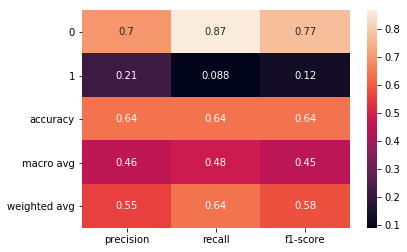

In [43]:
pred=[]
X_train=factors_Df.iloc[:,1:4]
param_grid={'bootstrap':[True], 'max_depth':[110,130,150,170],'min_samples_leaf':[7,9,11,13],'min_samples_split':[6,8,12],'n_estimators':[10,15,20,25]}
gs=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)

gs.fit(X_train,y_train)
best_rf=gs.best_estimator_
y_true,y_pred=y_supp,best_rf.predict(X_test.iloc[:,1:4])

df=pd.DataFrame(classification_report(y_true,y_pred,output_dict=True))
sea.heatmap(df.iloc[:-1, :].T, annot=True)

## 1. Random Forest
### 1.2 Initial Data

In [44]:
data=data.drop(['typea'],axis=1)
data.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,1,160,12.00,5.73,23.11,Present,25.30,97.20,52,1
2,2,144,0.01,4.41,28.61,Absent,28.87,2.06,63,1
3,3,118,0.08,3.48,32.28,Present,29.14,3.81,46,0
4,4,170,7.50,6.41,38.03,Present,31.99,24.26,58,1
5,5,134,13.60,3.50,27.78,Present,25.99,57.34,49,1


In [45]:
X_train=data.loc[X_train.index]; X_test=data.loc[X_test.index]
X_train['famhist'].replace({"Absent":0,"Present":1},inplace=True)
X_test['famhist'].replace({"Absent":0,"Present":1},inplace=True)

y=df1['chd']; y_train=y.loc[y_train.index]; y_test=y[y_test.index]
 

param_grid={'bootstrap':[True], 'max_depth':[110,130,150,170],'min_samples_leaf':[7,9,11,13],'min_samples_split':[8,12,14],'n_estimators':[10,15,20,25]}
gs=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)
gs.fit(X_train,y_train)
best_rf_=gs.best_estimator_
y_true,y_pred=y_supp,best_rf_.predict(X_test)
pred.append(y_pred)

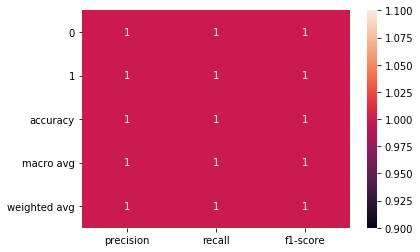

In [46]:
df=pd.DataFrame(classification_report(y_true,y_pred,output_dict=True))
sea.heatmap(df.iloc[:-1, :].T, annot=True)

## 2. Support Vector Machine
### 2.1 Principal Component

In [47]:
X_train=factors_Df.iloc[:,1:4]
SVCpipe = Pipeline([('SVC',LinearSVC())])
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
best_svc=linearSVC.best_estimator_
y_true,y_pred=y_supp,best_svc.predict(X_test.iloc[:,1:4])

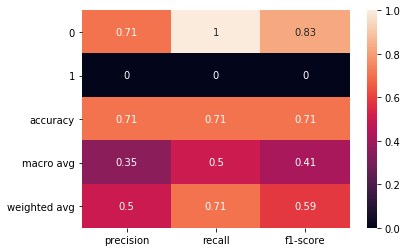

In [48]:
df=pd.DataFrame(classification_report(y_true,y_pred,output_dict=True))
sea.heatmap(df.iloc[:-1, :].T, annot=True)

## 2. Support Vector Machine
### 2.2 Initial Data

In [49]:
X_train=data.loc[X_train.index]; X_test=data.loc[X_test.index]
y=df1['chd']; y_train=y.loc[y_train.index]; y_test=y[y_test.index]
X_train['famhist'].replace({"Absent":0,"Present":1},inplace=True)
X_test['famhist'].replace({"Absent":0,"Present":1},inplace=True)

In [50]:
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
best_svc=linearSVC.best_estimator_
y_true,y_pred=y_supp,best_svc.predict(X_test)
pred.append(y_pred)

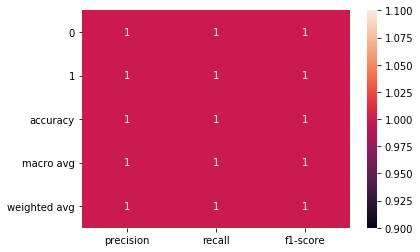

In [51]:
df=pd.DataFrame(classification_report(y_true,y_pred,output_dict=True))
sea.heatmap(df.iloc[:-1, :].T, annot=True)

In this part, a majority vote is taken. A performance check of this
classification system of the two best models is subsequently carried out

In [52]:
s=pred[0]+pred[1]
pred_finale=[]
for i in range(len(s)):
    if (s[i] >= 1):
        pred_finale.append(1)
    else:
        pred_finale.append(0)
pred_finale=pd.DataFrame(pred_finale)

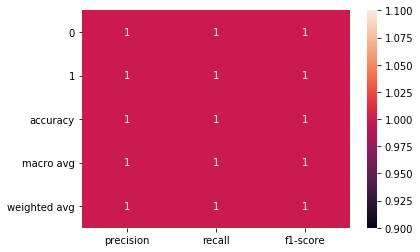

In [53]:
df=pd.DataFrame(classification_report(y_true,y_pred,output_dict=True))
sea.heatmap(df.iloc[:-1, :].T, annot=True)

Conclusion: With dimensionality reduction, we don't necessarily get better
results only with the dataset. It should be noted that a rotation of the factorial axis would probably
improved results